In [144]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data1=pd.read_csv('train.csv')

In [3]:
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


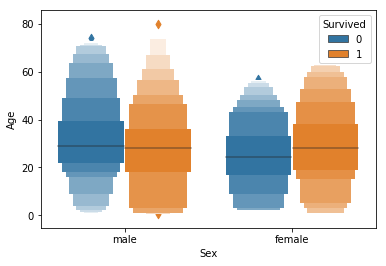

In [15]:

sns.boxenplot(data=data1, x='Sex', y='Age', hue='Survived',scale='linear')

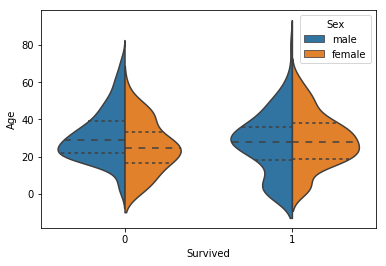

In [16]:
sns.violinplot(data=data1, x='Survived', y='Age', hue='Sex', split=True, inner='quart')

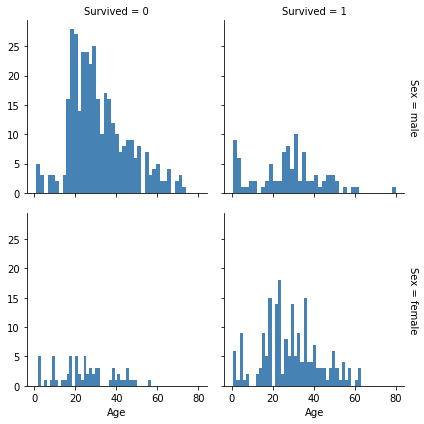

In [19]:
g1=sns.FacetGrid(data1, row='Sex', col='Survived', margin_titles=True)
g1.map(plt.hist, 'Age', color='steelblue', bins=40)

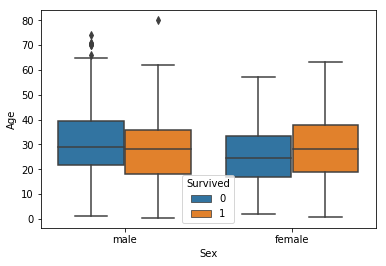

In [23]:
sns.boxplot(data=data1, x='Sex', y='Age', hue='Survived')

AxesSubplot(0.325556,0.125;0.419444x0.755) AxesSubplot(0.325556,0.125;0.419444x0.755)


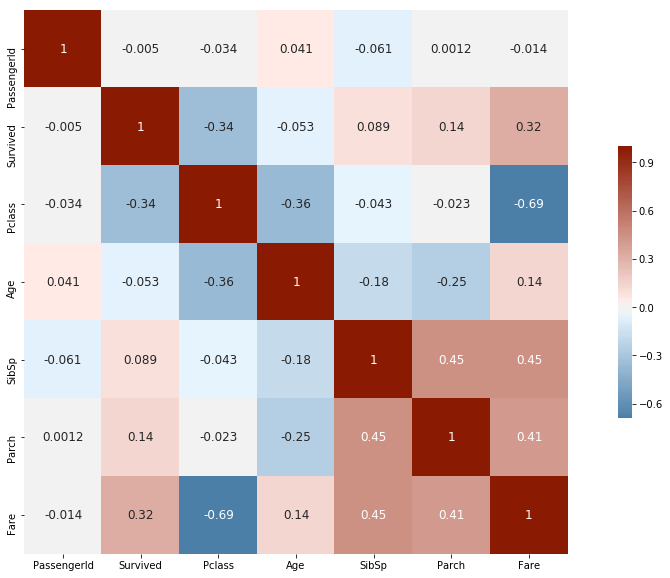

In [93]:
def plot_correlation_map( data1 ):
    corr = data1.corr(method='spearman')
    s , ax = plt.subplots( figsize =( 18 , 10 ) )
    cmap = sns.diverging_palette( 250 , 15 , s=99, l=30, as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap=cmap,
        center=0,
        square=True,
        cbar_kws={ 'shrink' : 0.5 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )
    print(s,ax)
plot_correlation_map(data1)


In [95]:
#the pandas corr function allows us to analyze corelation index between multiple categorical and/or numerical variables using Pearson
#or Spearman methods
# A perfect correlation index should be either 1 or -1.
# The seaborn heatmap method transform a 2D dataset to a color encoded matrix
# In this analyze, we found a moderate correlation between Pclass and Fare and surviving probability

In [250]:
data1=pd.read_csv('train.csv')
x=data1.Name.str.partition(',')
y=x[2].str.partition('.')
y=y.drop(columns=[1,2],axis=1)
data1.insert(3,'Title',y)

Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"}
# Title_Dictionary2 = pd.DataFrame({Title_Dictionary})
# size1=data1.shape[0]

    

In [252]:
data1['Title'] = data1.Name.map(lambda x: x.split(', ')[1].split('.')[0]).map(Title_Dictionary)

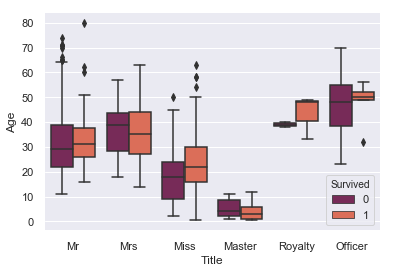

In [358]:
sns.boxplot(data=data1, x='Title', y='Age', hue='Survived', palette='rocket')
sns.despine(offset=2, trim=True)


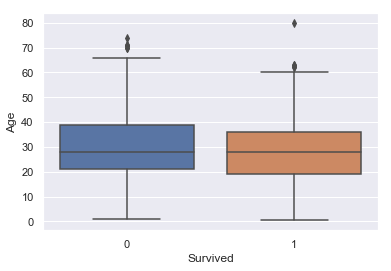

In [359]:
sns.boxplot(data=data1,x='Survived', y='Age')

In [348]:
zz=pd.DataFrame(data1.groupby('Title').sum().Survived / data1.groupby('Title').count().Survived)
print (zz.Survived)

Title
Master     0.575000
Miss       0.701087
Mr         0.156673
Mrs        0.795276
Officer    0.277778
Royalty    0.600000
Name: Survived, dtype: float64


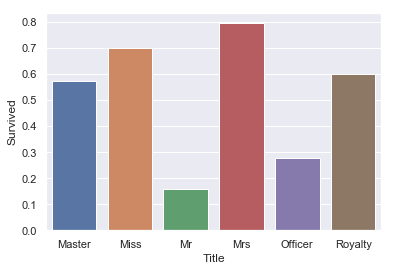

In [353]:
sns.barplot(x=zz.index, y=zz.Survived)

In [354]:
zz2=pd.DataFrame(data1.groupby('Sex').sum().Survived/data1.groupby('Sex').count().Survived)

        Survived
Sex             
female  0.742038
male    0.188908


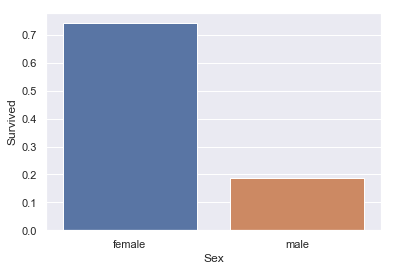

In [356]:
sns.barplot(x=zz2.index,y=zz2.Survived)
print(zz2)

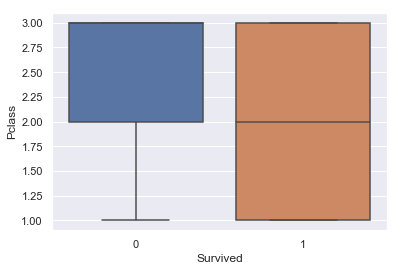

In [361]:
sns.boxplot(data=data1, x='Survived', y='Pclass')

In [378]:
zz3=pd.DataFrame((data1.groupby('Pclass').sum().Survived)/(data1.groupby('Pclass').count().Survived))

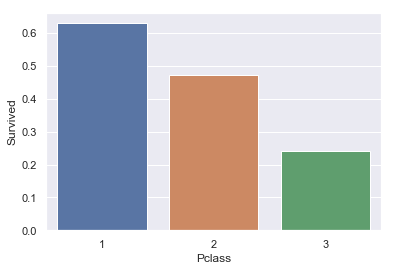

In [382]:
sns.barplot(data=zz3, x=zz3.index, y=zz3.Survived)

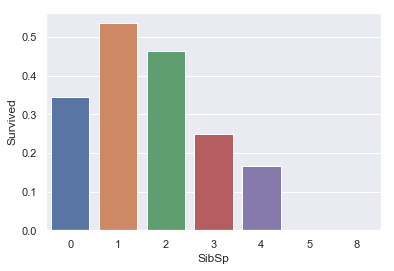

In [397]:
SibSp1=pd.DataFrame(data1.groupby('SibSp').sum().Survived/data1.groupby('SibSp').count().Survived)
SibSp1.head()
sns.barplot(data=SibSp1, x=SibSp1.index, y=SibSp1.Survived)

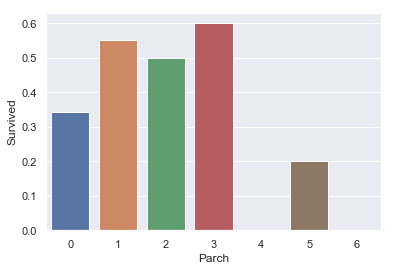

In [398]:
Parch1=pd.DataFrame(data1.groupby('Parch').sum().Survived/data1.groupby('Parch').count().Survived)
Parch1.head()
sns.barplot(data=Parch1, x=Parch1.index, y=Parch1.Survived)

In [453]:
def substract (x, y):
    return x-(y*3)
data1['FamIndex']=data1['Parch'].apply(substract, args=(data1['SibSp'],))[0]
data1.head()


,PassengerId,Survived,Pclass,Title,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamIndex
0,1,0,3,Mr,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-3
1,2,1,1,Mrs,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,-3
2,3,1,3,Miss,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-3
3,4,1,1,Mrs,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,-3
4,5,0,3,Mr,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,-3


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

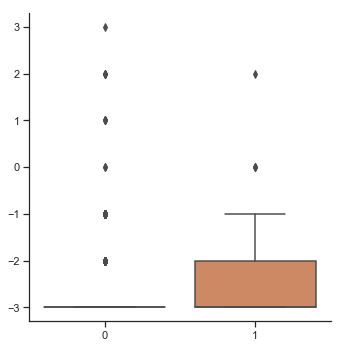

In [445]:
sns.set(style="ticks", color_codes=True)
sns.catplot(data=data1, x=data1.Survived, y=data1.FamIndex, kind='box')

In [461]:
data1['Survived'].corr(data1['FamIndex'], method='spearman')

0.13826563286545587

          Survived
FamIndex          
-3        0.343658
-2        0.550847
-1        0.500000
 0        0.600000
 1        0.000000
 2        0.200000
 3        0.000000


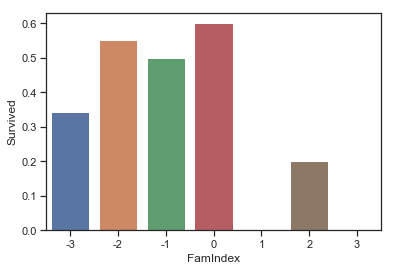

In [466]:
FamIndexSurv=pd.DataFrame(data1.groupby(['FamIndex']).sum().Survived/data1.groupby(['FamIndex']).count().Survived)
print(FamIndexSurv)
sns.barplot(data=FamIndexSurv, x=FamIndexSurv.index, y=FamIndexSurv.Survived)